<a href="https://colab.research.google.com/github/santhoshbvsrk/DeepLearning/blob/main/ChurnModelling/ChurnModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/santhoshbvsrk/DeepLearning/main/ChurnModelling/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Checking for Missing Values

In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [51]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 38.3MB 584kB/s
     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 1.1MB 9.8MB/s 
     |████████████████████████████████| 3.2MB 18.7MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 296kB 34.3MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=81961a39855aed16a3a4be9e17508b91903b9623ae5018bac86ea4241d138344
  Stored in directory: /tmp/pip-ephem-wheel-cache-gybl98yg/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=5332d0befb8417fafaee0ff4a7dee13ac2551869abb3163e35e2fb5939cbda1a
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=f

Replacing Index with RowNumber column as it can be considered as Index.

In [16]:
from pandas_profiling import ProfileReport

In [18]:
CustomerChurn_profiling=ProfileReport(df, title='CustomerChurn_pandasprofiling_output', explorative=True)
CustomerChurn_profiling.to_file("CustomerChurn_pandasprofiling_output.html")

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df[['Surname','Geography','Gender','Age']].value_counts(ascending=False)

Surname   Geography  Gender  Age
Wright    Germany    Female  48     3
Genovesi  France     Female  33     3
Tien      France     Male    34     3
Chinedum  France     Male    34     3
Smith     France     Male    37     3
                                   ..
Nwebube   Spain      Male    37     1
                             34     1
          Germany    Male    44     1
          France     Male    37     1
Abazu     Spain      Female  28     1
Length: 9759, dtype: int64

In [44]:
df[(df.Surname=='Wright') & (df.Geography=='Germany') & (df.Gender=='Female') & (df.Age==48)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4021,4022,15697100,Wright,772,Germany,Female,48,6,108736.52,1,1,0,184564.67,1
8910,8911,15744873,Wright,657,Germany,Female,48,5,143595.87,1,0,0,101314.65,1
9218,9219,15806318,Wright,676,Germany,Female,48,2,124442.38,1,1,0,15068.53,1


Dropping RowNumber, Surname & CustomerId as those doesn't have impact in determining if Customer is leaving the bank or not.

In [45]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [46]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Checking for Missing Values

In [47]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

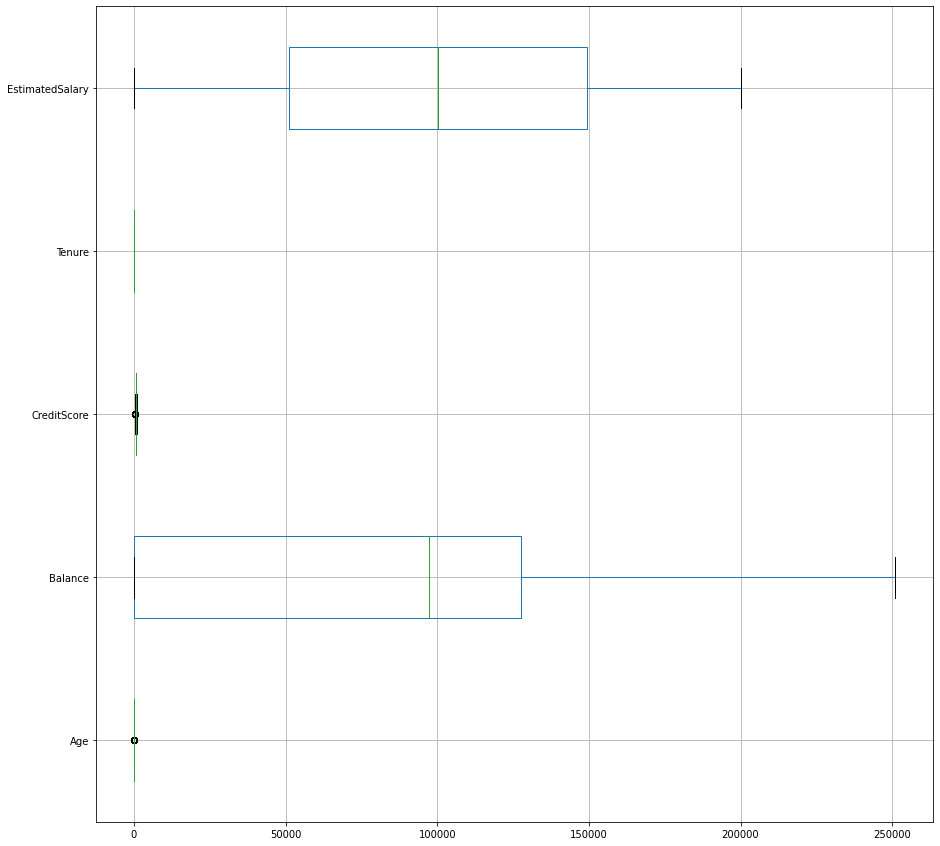

In [49]:
plt.figure(figsize=(15,15))
df1[['Age','Balance','CreditScore', 'Tenure', 'EstimatedSalary']].boxplot(vert=0)

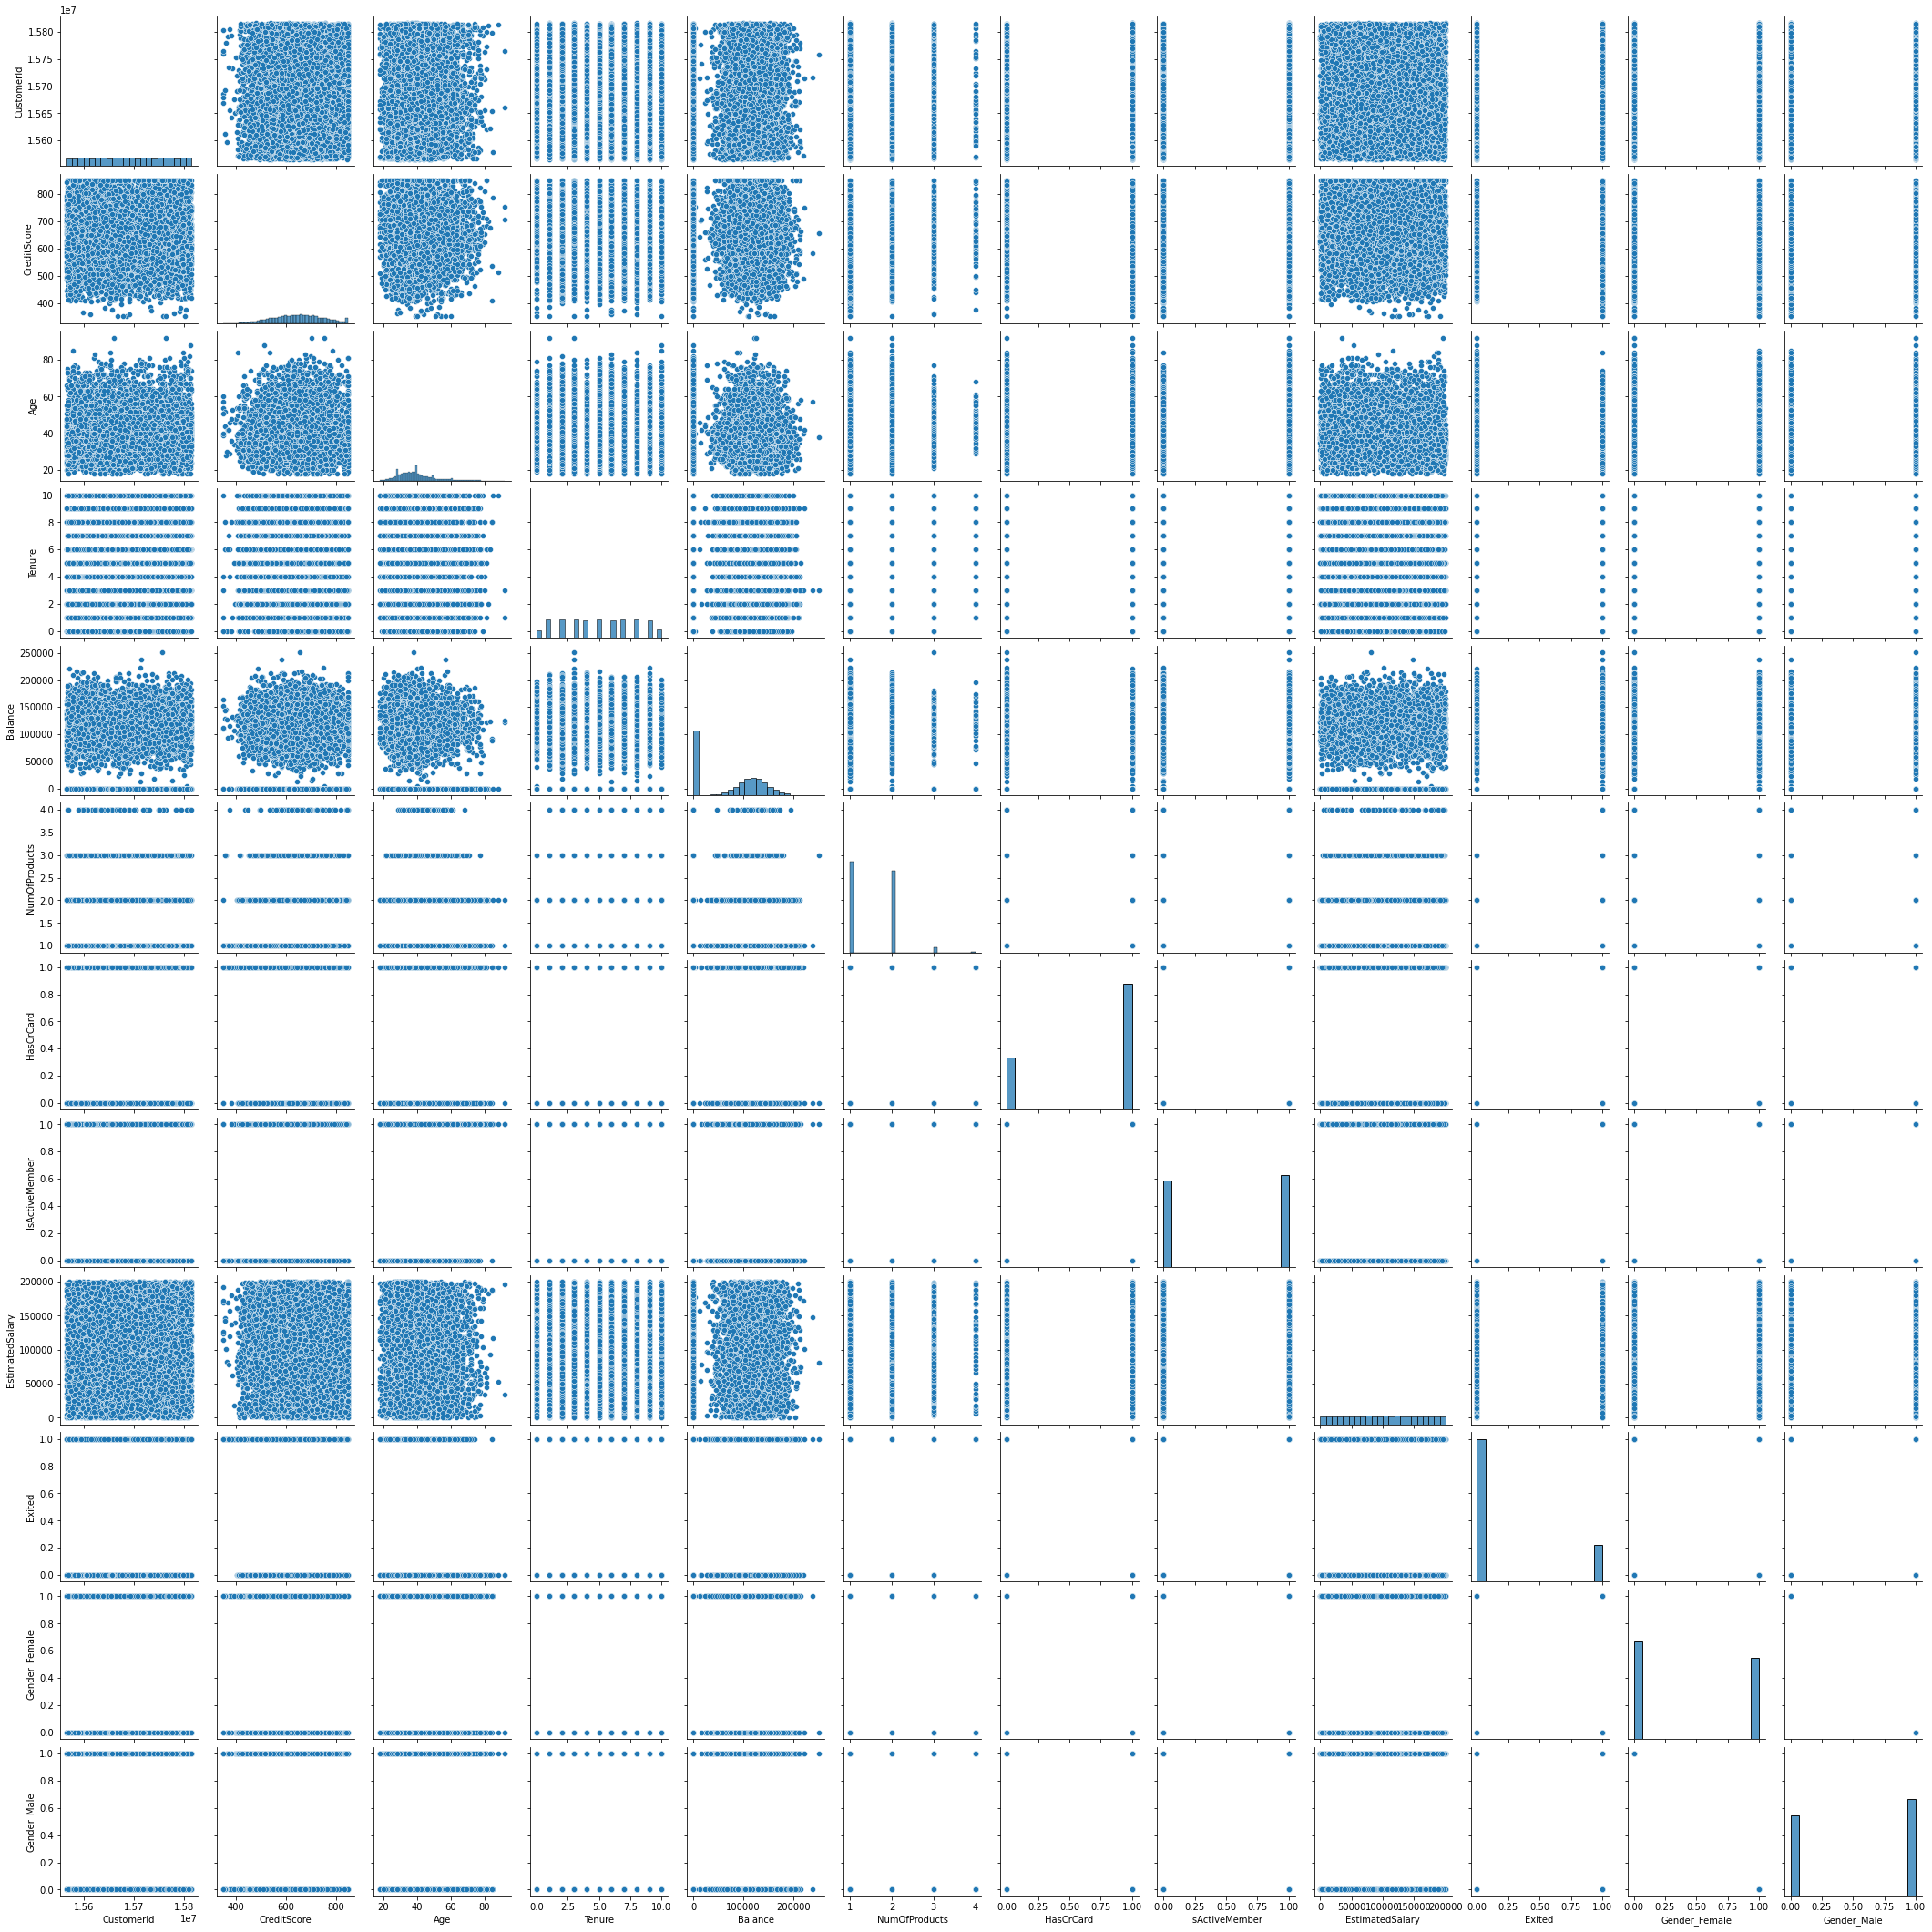

In [51]:
sns.pairplot(df1)



1.   CustomerId is the only Unique Key in the dataset, as combination of other fields are returning more than 1 records. For example, there are multiple customers sharing the same surname, Geography, Gender & Age.
2.   Exited is our target variable which says if a customer has left the bank or not.
3. Of the 10k customers 2037 Customers have left bank i.e., 20.37% of customer have left bank.


**NOTE**: Here 1 means YES & 0 means NO

In [11]:
df[df['Exited']==1]['CreditScore'].value_counts()

850    43
651    17
705    16
637    14
727    13
       ..
836     1
800     1
838     1
776     1
486     1
Name: CreditScore, Length: 420, dtype: int64

In [12]:
df[df['Exited']==0]['CreditScore'].value_counts()

850    190
678     50
655     43
684     43
670     42
      ... 
419      1
441      1
442      1
414      1
408      1
Name: CreditScore, Length: 442, dtype: int64

In [13]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [14]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [15]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [40]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df1 = pd.get_dummies(df,columns=['Gender'])

In [30]:
import matplotlib.pyplot as plt

In [39]:
df1.head()

,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0
